In [1]:
getwd()

[1] "/users/genomics/xoel/codebases/cortical_disorders2"

In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Expression data

## Data

In [3]:
# Load data
load("raw/NicoH9Expression/NicoHsPASS_ExprsLog2_forGabrielHeatmaps.rdata",
     verbose=T)

Loading objects:
  NicoHsPASS.ExprsLog2
  NicoHsPASS.sampleMeta
  NicoHsPASS.geneMeta


In [4]:
exp.data <- NicoHsPASS.ExprsLog2
head(exp.data)

,P2.FGF20,P2.FGF10,P2.FGF1,P2.FGF0.1,P3.FGF20,P3.FGF10,P3.FGF1,P3.FGF0.1,P4.FGF20,P4.FGF10,P4.FGF1,P4.FGF0.1,P6.FGF20,P6.FGF10,P6.FGF1,P6.FGF0.1,P8.FGF20,P8.FGF10,P8.FGF1,P8.FGF0.1
RPPH1,13.04623,12.28241,11.24364,12.27173,12.12812,12.03452,13.00799,12.17872,12.05932,11.86173,11.98733,11.62126,12.00351,12.63748,11.93306,12.33148,12.23537,12.43607,12.59975,12.52714
RMRP,12.48491,12.11243,11.38070,12.09172,12.34055,12.44420,13.10532,12.28078,12.08826,11.46426,11.66939,11.90056,11.91875,11.97331,11.51441,11.98859,11.76499,12.19002,12.34510,12.08683
EEF1A1,11.62933,11.59329,11.66738,11.63242,11.68348,11.69902,11.56305,11.34799,11.76610,11.79932,11.75743,11.05350,11.49185,11.69776,11.58537,11.67830,11.39488,11.75448,11.73382,11.78609
RPS27,10.51746,11.34083,11.32416,11.54350,11.45687,11.54094,11.09534,11.39159,11.34469,11.30040,11.33700,10.87653,11.00994,10.38989,11.26149,11.32254,10.69421,11.16709,11.29963,11.25599
HIST1H4E,11.86527,10.61179,10.55470,10.90878,11.08158,10.89391,11.72504,10.57039,11.11413,10.92014,11.03981,10.98338,11.24872,12.17598,10.92614,10.78664,10.62988,10.98815,10.69400,10.27310
RPL23,11.09727,11.02227,11.07019,11.00418,10.98213,10.96352,10.80222,10.86794,10.96422,11.07841,11.12587,10.65969,10.70524,11.06947,11.07815,10.82535,10.72543,10.96961,10.94586,10.90868


In [5]:
dim(exp.data)
exp_df.original_genes <- exp.data

[1] 19939    20

## Remove genes with very low / no expression

[1] "Genes with total expression = 0: 204"


0%     25%     50%     75%    100% 
  0.005   4.192  40.619  77.650 244.427

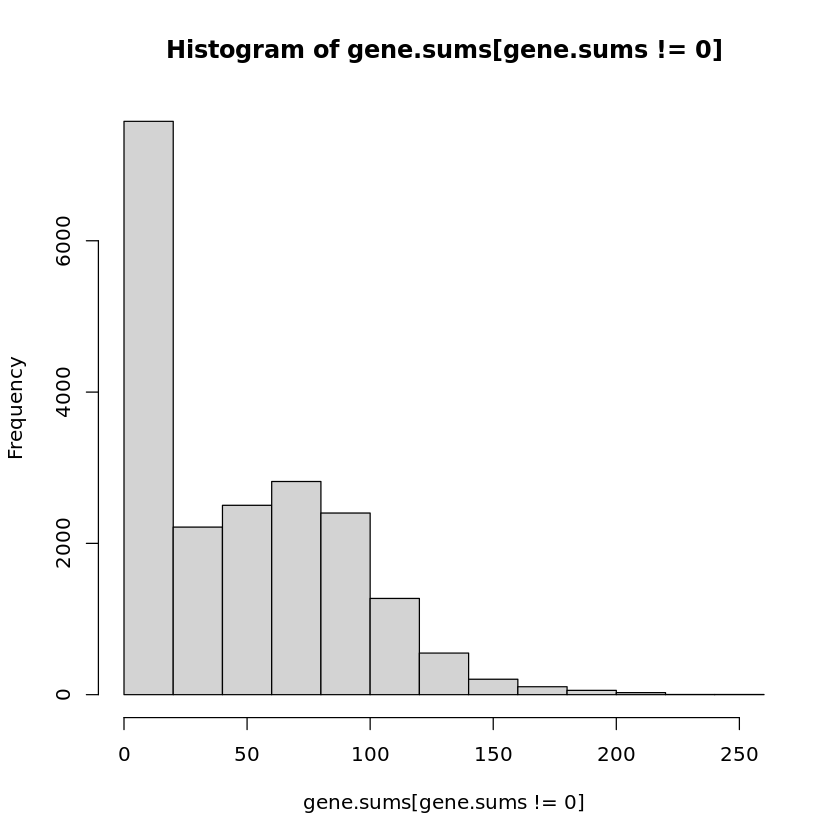

In [6]:
gene.sums <- rowSums(exp.data)
print(paste('Genes with total expression = 0:', sum(gene.sums == 0)))
round(quantile(gene.sums[gene.sums != 0]), 3)
hist(gene.sums[gene.sums != 0])

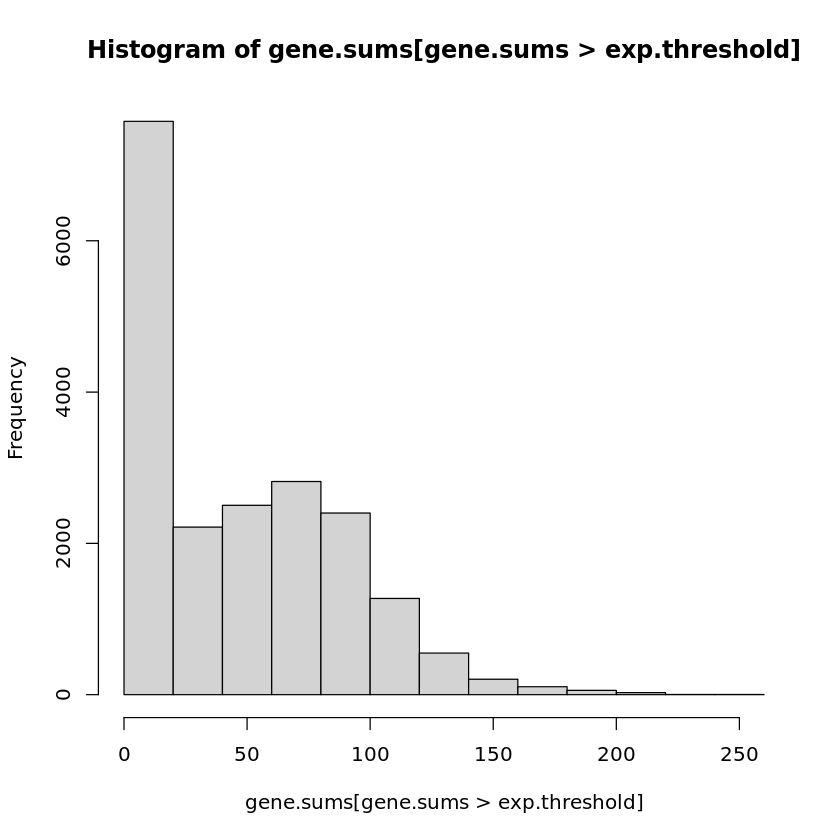

In [7]:
exp.threshold <- 0
hist(gene.sums[gene.sums > exp.threshold])

In [8]:
exp.data <- exp.data[gene.sums > exp.threshold, ]

In [9]:
dim(exp.data)
exp_df.onlyExpressed <- exp.data

[1] 19735    20

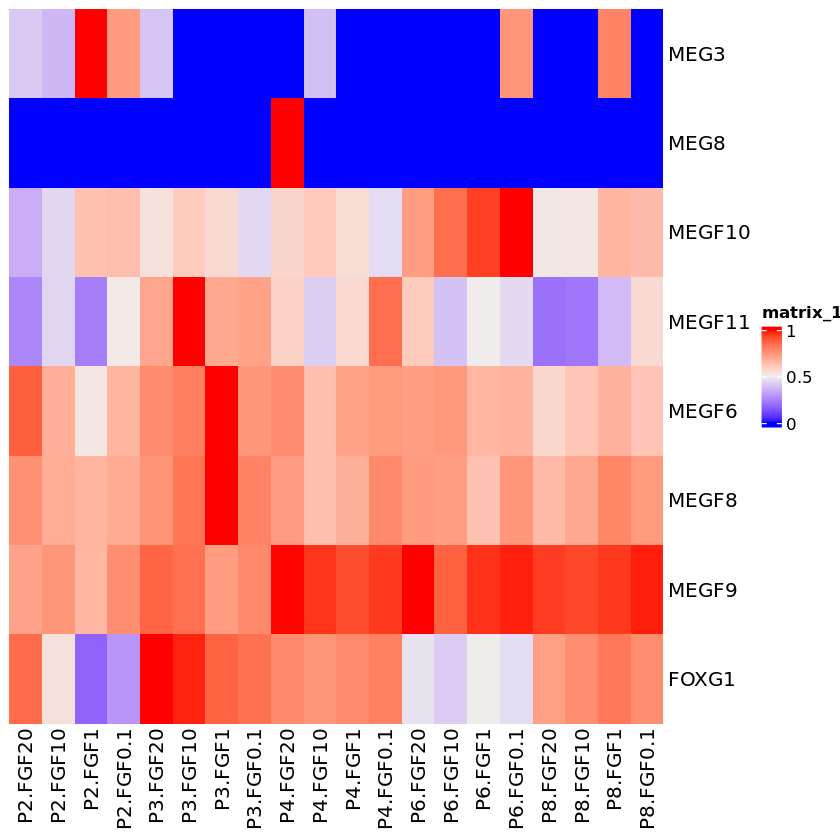

In [10]:
SELECTED <- c(sort(grep(pattern = '^MEG', rownames(exp.data), value=T)), 'FOXG1')

ComplexHeatmap::Heatmap(as.matrix((t(apply(exp.data, 1, function(X)X/max(X)))[SELECTED, ])), cluster_columns = F, cluster_rows = F)

In [11]:
long.exp <- reshape2::melt(data.frame(exp.data,
                                      Gene=factor(rownames(exp.data),rownames(exp.data))), id.vars='Gene', value.name='Expression', variable.name='Sample')

In [12]:
library(ggplot2)
library(viridis)

Loading required package: viridisLite



In [13]:
png('data/Expression.heatmap.png', width=16, height=9, res = 300, units = 'in', pointsize = 12)
ggplot(long.exp, aes(x=Gene, y=Sample, fill=Expression)) +
    geom_tile(color=NA) + 
    theme(axis.text.x=element_blank(),axis.ticks.x=element_blank()) +
    scale_fill_viridis_c(name='Expression (log2 RPKM)', option='rocket')
dev.off()

png 
  2

## Binarize to peak sample

In [14]:
peak.data <- data.frame(t(apply(exp.data, 1, function(x){
    a <- setNames(rep(0, length(x)), names(x))
    a[which.max(x)] <- 1
    a
})))

## Export dataframes

In [15]:
write.csv(
    peak.data,
    'data/nico_peak_expression.csv',
    row.names=T
)
write.csv(
    exp_df.onlyExpressed,
    'data/nico_expression_log2.onlyExpressed.csv',
    row.names=T
)
write.csv(
    exp_df.original_genes,
    'data/nico_expression_log2.original_genes.csv',
    row.names=T
)

# Diseases

In [16]:
# load("raw/DiseaseGenes/DiseaseFULL.rda", verbose=T)
# head(disease_full)

## Data

In [17]:
disease_full <- read.csv('~/codebases/gene_disease_asociation/parsed_lists.csv', row.names=1)
colnames(disease_full)[1] <- 'GENE'
head(disease_full)

,GENE,NEUROT_2018,ADHD_2019,MDD_2018,IQ_2018,BD_2019,AN_2019,AD_2019,ASD_2019,PD_2014,⋯,DD,Hydrocephaly,Cobblestone,DevDyslexia,FCDandmTOR,Heterotopia,Lissencephaly,Microcephaly,Polymicrogyria,RareMCD
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
BTN2A1,BTN2A1,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SLC25A27,SLC25A27,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
EXOC6B,EXOC6B,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
RBM4B,RBM4B,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MIR924HG,MIR924HG,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NACC1,NACC1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [18]:
# Remove GENE column
disease_full$GENE <- NULL

In [19]:
# Fix colname
colnames(disease_full) <- ifelse(colnames(disease_full) == 'Microcephlaly', 'Microcephaly', colnames(disease_full))
head(disease_full)

,NEUROT_2018,ADHD_2019,MDD_2018,IQ_2018,BD_2019,AN_2019,AD_2019,ASD_2019,PD_2014,SCZ_2020,⋯,DD,Hydrocephaly,Cobblestone,DevDyslexia,FCDandmTOR,Heterotopia,Lissencephaly,Microcephaly,Polymicrogyria,RareMCD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
BTN2A1,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SLC25A27,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
EXOC6B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
RBM4B,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MIR924HG,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NACC1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [20]:
colSums(disease_full)

NEUROT_2018      ADHD_2019       MDD_2018        IQ_2018        BD_2019 
           300             38             70            859            218 
       AN_2019        AD_2019       ASD_2019        PD_2014       SCZ_2020 
           107            192             29             34            130 
       SFAR_S1        SFAR_S2        SFAR_S3      SFAR_Synd       ASD_HC65 
           214            211            506            126             65 
            DD   Hydrocephaly    Cobblestone    DevDyslexia     FCDandmTOR 
            93            112             21             28             79 
   Heterotopia  Lissencephaly   Microcephaly Polymicrogyria        RareMCD 
            17             44             73             30             24

In [21]:
dis_df.original <- disease_full
dim(disease_full)

[1] 2842   25

## Diseases to merge

In [22]:
## ASD lists
asd.dis <- c(
    'SFAR_S1','SFAR_S2','SFAR_S3','SFAR_Synd',
    'ASD_HC65','ASD_2019')

In [23]:
# Create list of all ASD genes
disease_full$ASD <- as.numeric(rowSums(disease_full[,asd.dis]) > 0)
disease_full[,asd.dis] <- NULL
head(disease_full)

,NEUROT_2018,ADHD_2019,MDD_2018,IQ_2018,BD_2019,AN_2019,AD_2019,PD_2014,SCZ_2020,DD,Hydrocephaly,Cobblestone,DevDyslexia,FCDandmTOR,Heterotopia,Lissencephaly,Microcephaly,Polymicrogyria,RareMCD,ASD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
BTN2A1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SLC25A27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
EXOC6B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
RBM4B,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MIR924HG,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NACC1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
dim(disease_full)

[1] 2842   20

## Order

In [25]:
# Set predefined order
sorted_diseases <- c(
  'Microcephaly', 'ASD_2019', 'Hydrocephaly', 'RareMCD', 'MDD_2018',
  'Polymicrogyria', 'SCZ_2020', 'IQ_2018', 'AN_2019', 'NEUROT_2018', 'PD_2014',
  'AD_2019', 'SFAR_S2', 'SFAR_Synd', 'Lissencephaly', 'SFAR_S3', 'BD_2019',
  'DevDyslexia', 'Heterotopia', 'ADHD_2019', 'ASD_HC65', 'DD', 'FCDandmTOR',
  'Cobblestone', 'SFAR_S1', 'ASD')

In [26]:
# Sort following predefined order
disease_full <- disease_full[,sorted_diseases[sorted_diseases%in%colnames(disease_full)]]

head(disease_full)

,Microcephaly,Hydrocephaly,RareMCD,MDD_2018,Polymicrogyria,SCZ_2020,IQ_2018,AN_2019,NEUROT_2018,PD_2014,AD_2019,Lissencephaly,BD_2019,DevDyslexia,Heterotopia,ADHD_2019,DD,FCDandmTOR,Cobblestone,ASD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
BTN2A1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
SLC25A27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
EXOC6B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
RBM4B,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
MIR924HG,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NACC1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
dim(disease_full)

[1] 2842   20

## Excluded diseases

In [28]:
exclusion_list <- c('FMRP', 'CHD8', 'IQ_2018', asd.dis)

In [29]:
# Filter out extra datasets
disease_full <- disease_full[,!colnames(disease_full)%in%exclusion_list]

In [30]:
# Filter out 0-genes DISEASES
disease_full <- disease_full[, colSums(disease_full) > 0]

In [31]:
head(disease_full)

,Microcephaly,Hydrocephaly,RareMCD,MDD_2018,Polymicrogyria,SCZ_2020,AN_2019,NEUROT_2018,PD_2014,AD_2019,Lissencephaly,BD_2019,DevDyslexia,Heterotopia,ADHD_2019,DD,FCDandmTOR,Cobblestone,ASD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
BTN2A1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SLC25A27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
EXOC6B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
RBM4B,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
MIR924HG,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NACC1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
dis_df.original_genes <- disease_full
dim(disease_full)

[1] 2842   19

## Reshape genes

In [33]:
colSums(disease_full)

Microcephaly   Hydrocephaly        RareMCD       MDD_2018 Polymicrogyria 
            73            112             24             70             30 
      SCZ_2020        AN_2019    NEUROT_2018        PD_2014        AD_2019 
           130            107            300             34            192 
 Lissencephaly        BD_2019    DevDyslexia    Heterotopia      ADHD_2019 
            44            218             28             17             38 
            DD     FCDandmTOR    Cobblestone            ASD 
            93             79             21           1029

In [34]:
# Filter out 0-disease GENES
disease_full <- disease_full[rowSums(disease_full) > 0,] 

In [35]:
dis_df.onlyRisk <- disease_full
dim(disease_full)

[1] 2246   19

In [36]:
expression.genes <- rownames(exp_df.original_genes)

In [37]:
# Are all genes in expression data?
print(paste(
    '# disease genes not present in expression data:',
    sum(!rownames(disease_full) %in% expression.genes)))
# Are all genes in expression data?
print(paste(
    '# expression-data genes not present in disease data:',
    sum(!expression.genes %in% rownames(disease_full))))

[1] "# disease genes not present in expression data: 222"
[1] "# expression-data genes not present in disease data: 17915"


We will include all genes from the disease association list and all those in Nicola H9 data (expressed or not)

In [38]:
missing.genes <- expression.genes[!expression.genes %in% rownames(disease_full)]
disease_full[missing.genes,] <- 0

In [39]:
dis_df.unionExpData <- disease_full
dim(disease_full)

[1] 20161    19

In [40]:
colSums(disease_full)

Microcephaly   Hydrocephaly        RareMCD       MDD_2018 Polymicrogyria 
            73            112             24             70             30 
      SCZ_2020        AN_2019    NEUROT_2018        PD_2014        AD_2019 
           130            107            300             34            192 
 Lissencephaly        BD_2019    DevDyslexia    Heterotopia      ADHD_2019 
            44            218             28             17             38 
            DD     FCDandmTOR    Cobblestone            ASD 
            93             79             21           1029

And we exclude those not mapped in the expression system

In [41]:
print(paste(
    '# disease genes not present in expression data:',
    sum(!rownames(disease_full) %in% expression.genes)))

disease_full <- disease_full[rownames(disease_full) %in% expression.genes,]

print(paste(
    '# disease genes not present in expression data:',
    sum(!rownames(disease_full) %in% expression.genes)))


[1] "# disease genes not present in expression data: 222"
[1] "# disease genes not present in expression data: 0"


In [42]:
dis_df.intersectionExpData <- disease_full
dim(disease_full)

[1] 19939    19

In [43]:
dim(disease_full)
head(disease_full)
tail(disease_full)

[1] 19939    19

,Microcephaly,Hydrocephaly,RareMCD,MDD_2018,Polymicrogyria,SCZ_2020,AN_2019,NEUROT_2018,PD_2014,AD_2019,Lissencephaly,BD_2019,DevDyslexia,Heterotopia,ADHD_2019,DD,FCDandmTOR,Cobblestone,ASD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLC25A27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
EXOC6B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
RBM4B,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
NACC1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
TSPAN7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
MUC12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,Microcephaly,Hydrocephaly,RareMCD,MDD_2018,Polymicrogyria,SCZ_2020,AN_2019,NEUROT_2018,PD_2014,AD_2019,Lissencephaly,BD_2019,DevDyslexia,Heterotopia,ADHD_2019,DD,FCDandmTOR,Cobblestone,ASD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZNF99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MUC21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LOC100507362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HRNR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
USP17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TNF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
colSums(disease_full)

Microcephaly   Hydrocephaly        RareMCD       MDD_2018 Polymicrogyria 
            65            105             23             51             29 
      SCZ_2020        AN_2019    NEUROT_2018        PD_2014        AD_2019 
           113             99            270             30            178 
 Lissencephaly        BD_2019    DevDyslexia    Heterotopia      ADHD_2019 
            40            199             25             13             27 
            DD     FCDandmTOR    Cobblestone            ASD 
            91             64             15            970

## Export dataframe

In [45]:
write.csv(
    dis_df.original,
    'data/gene_disorder_associations.original.csv',
    row.names=T
)

In [46]:
write.csv(
    dis_df.original_genes,
    'data/gene_disorder_associations.original_genes.csv',
    row.names=T
)

In [47]:
write.csv(
    dis_df.onlyRisk,
    'data/gene_disorder_associations.onlyRisk.csv',
    row.names=T
)

In [48]:
write.csv(
    dis_df.unionExpData,
    'data/gene_disorder_associations.unionExpData.csv',
    row.names=T
)

In [49]:
write.csv(
    dis_df.intersectionExpData,
    'data/gene_disorder_associations.intersectionExpData.csv',
    row.names=T
)

### Supplementary Table 1  
We want to provide the list of gene-disease associations, but we use different ones throughout the study.  
- Original: contains all the associations as we loaded them.  
- OnlyRisk: is reshaped (merged ASDs and excluded IQ+FMRP+CHD8).
- IntersectionExpData: subset of genes expressed in the in vitro system.  

In [50]:
table(rowSums(dis_df.original) == 0)
table(colSums(dis_df.original) == 0)


FALSE 
 2842 


FALSE 
   25 

In [51]:
# we will provide the full table of results
# read.csv('~/codebases/gene_disease_asociation/parsed_magma_lists.csv', row.names=1) -> magma_table
read.table('~/codebases/gene_disease_asociation/AllDiseasesMAGMA_GeneLevel_181220.txt', header=T) %>% mutate(GENE=NULL) -> magma_table
magma_table #%>% rename() -> magma_table

GENE_SYMBOL,ASD_2019,ADHD_2019,SCZ_2020,BD_2019,OCD_2018,AN_2019,TS_2019,MDD_2018,NEUROT_2018,IQ_2018,AD_2019,PD_2014
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SAMD11,0.682160,0.907530,0.08420100,0.545300,0.420190,0.15042,0.62713,0.286360,0.050828,0.2983300,0.5861100,0.252100
NOC2L,0.470430,0.995830,0.00290120,0.731440,0.405790,0.14195,0.78709,0.233700,0.117350,0.6396200,0.7826700,NA
KLHL17,0.343240,0.995660,0.00394180,0.268910,0.408610,0.31307,0.80141,0.535590,0.090756,0.6027600,0.1991700,NA
PLEKHN1,0.237630,0.987000,0.00448300,0.509120,0.214860,0.38447,0.96090,0.202170,0.112590,0.2217500,0.0684570,NA
PERM1,0.030802,0.086298,0.54568000,0.387060,0.176320,0.18256,0.92371,0.297660,0.249030,0.0387320,0.2129300,0.997090
HES4,0.244210,0.010984,0.57001000,0.044115,0.165190,0.61952,0.61117,0.116490,0.188830,0.0042327,0.1704300,0.463800
ISG15,0.390340,0.823150,0.83740000,0.413090,0.248830,0.77761,0.54177,0.038158,0.143580,0.0173130,0.2077900,0.452050
AGRN,0.196310,0.744630,0.98418000,0.767310,0.158280,0.74299,0.84199,0.368320,0.061544,0.0888950,0.0062971,0.075701
RNF223,0.368450,NA,0.51565000,0.322320,0.187400,0.60967,0.44098,0.391080,0.023085,0.1710100,0.0687060,0.236370


In [52]:
excel.tables <- list(
    'Gene-Disease associations' = dis_df.original,
    'MAGMA pvalue' = magma_table,
    'Used in RcisTarget' = dis_df.intersectionExpData
    # 'FMRP and CHD8 targets' = ts3 # moved to its own table
)

openxlsx::write.xlsx(x = excel.tables, file = './results/supp_table.1.xlsx', rowNames=T)

### UpSet plot of diseases

# Summary of expression / risk overlap

# Plotting

In [58]:
meta.colors <- list()

## Sample color

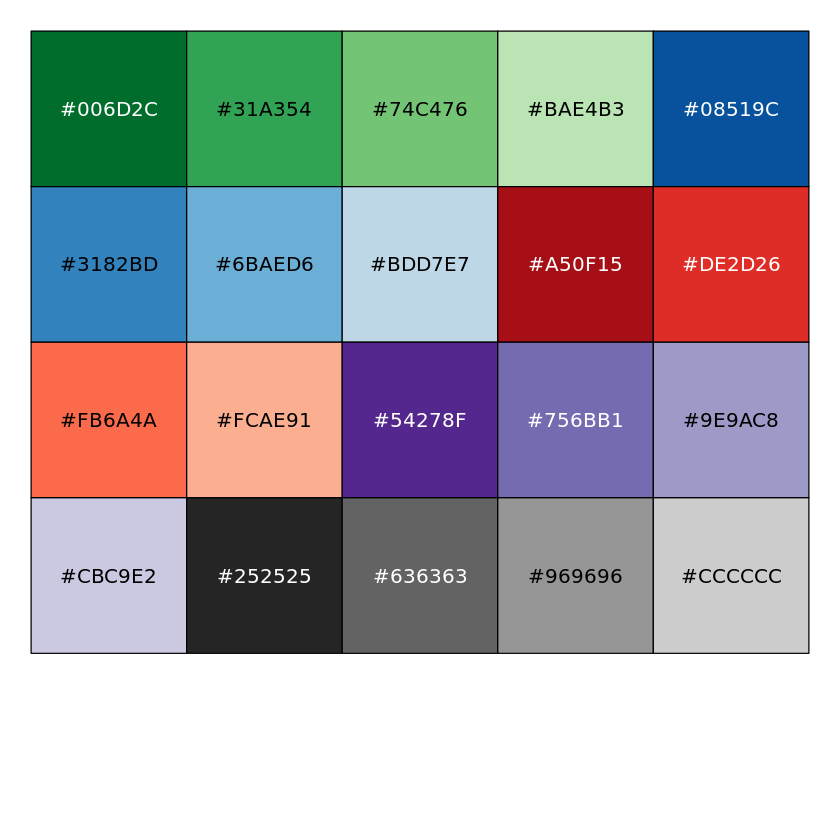

In [59]:
library(RColorBrewer)

c1<-rev(brewer.pal(n = 5, name = "Greens")[-1])
c2<-rev(brewer.pal(n = 5, name = "Blues")[-1])
c3<-rev(brewer.pal(n = 5, name = "Reds")[-1])
c4<-rev(brewer.pal(n = 5, name = "Purples")[-1])
c5<-rev(brewer.pal(n = 5, name = "Greys")[-1])

exp.col <- c(c1,c2,c3,c4,c5)
names(exp.col) <- colnames(exp.data)
scales::show_col(exp.col)

In [60]:
meta.colors[['PeakSample']] <- exp.col

## Peak sample

In [61]:
peakSample <- apply(NicoHsPASS.ExprsLog2, 1, function(x){names(x)[which.max(x)]})
head(peakSample)

RPPH1        RMRP      EEF1A1       RPS27    HIST1H4E       RPL23 
 "P2.FGF20"   "P3.FGF1"  "P4.FGF10" "P2.FGF0.1"  "P6.FGF10"   "P4.FGF1"

In [62]:
PeakSample <- data.frame(PeakSample=peakSample, SampleColor=exp.col[peakSample])
PeakSample$PeakSampleFct <- factor(peakSample, levels=names(exp.col))
PeakSample <- PeakSample %>% arrange(PeakSampleFct)

### Telley / Decon / DV

In [63]:
marques <- c( "(-1,-0.85]", "(-0.85,-0.7]", "(-0.7,-0.5]", "(-0.5,-0.25]", "(-0.25,0]", 
              "(0,0.25]","(0.25,0.5]", "(0.5,0.7]","(0.7,0.85]","(0.85,1]" )
b <- c( -1.0, -0.85,-0.7,-0.5,-0.25, 0.0,0.25,0.5, 0.7,0.85, 1.0)

(0.85,1]   (0.7,0.85]    (0.5,0.7]   (0.25,0.5]     (0,0.25]    (-0.25,0] 
   "#5F9EA0"    "#87B6B7"    "#AFCECF"     "grey93"     "grey93"     "grey93" 
(-0.5,-0.25]  (-0.7,-0.5] (-0.85,-0.7]   (-1,-0.85] 
    "grey93"    "#C47F7F"    "#A83F3F"    "#8B0000"

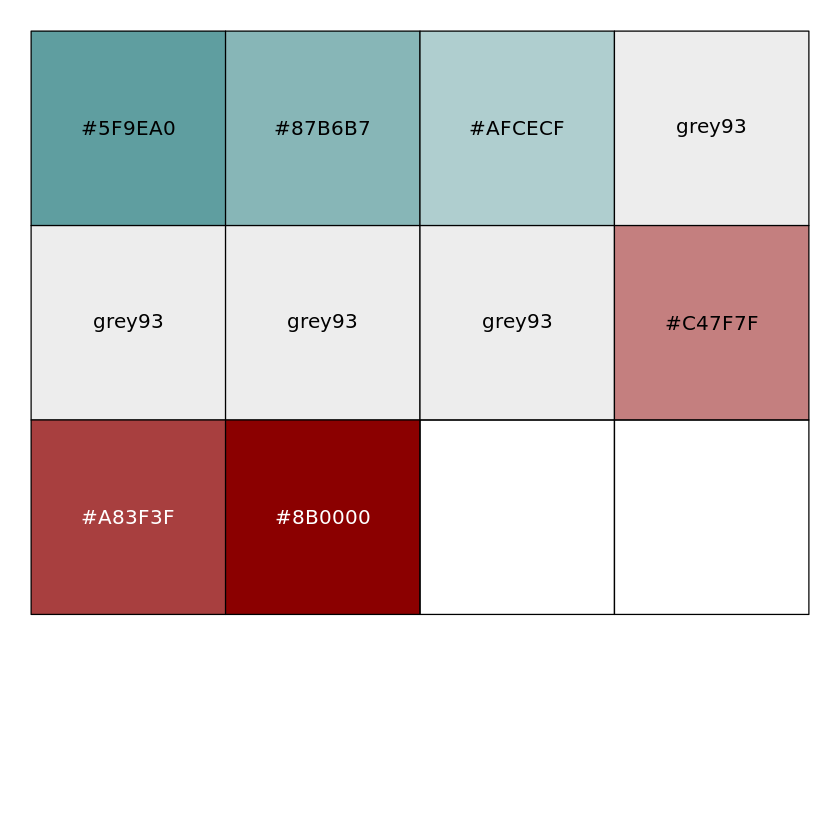

In [64]:
fblue <- colorRampPalette(c("white", "cadetblue"))
c2<-fblue(5)
fred <- colorRampPalette(c("white", "darkred"))
c3<-fred(5)
c2[1:2] <- "grey93"
c3[1:2] <- "grey93"

cols <- rev(setNames(rev(c(rev(c2),c3)), marques))
scales::show_col(cols)
cols

### Decon

In [65]:
load('./raw/TelleyDeconDV/DeconSlopes_V3_Scaled.rda', verbose=T)

Loading objects:
  decon_slope


In [66]:
head(decon_slope)

,GeneOriginal,GeneHuman,CPN,SCP,CTH
,<chr>,<chr>,<chr>,<chr>,<chr>
1,0610007C21Rik,NA,0.763143738287598,0.574921071377346,0.78712441685846
2,0610007L01Rik,NA,0.490773293670927,0.693711416898302,0.681932585987477
3,0610007P08Rik,NA,-0.64374285751604,-0.807969755282225,-0.683407869400644
4,0610007P14Rik,NA,0.768392023810116,0.689766220477207,0.741240537037613
5,0610007P22Rik,NA,0.174669950327338,0.166703702316486,0.456962143229321
6,0610009B22Rik,TRAPPC2,-0.772065886961941,-0.688257852400369,-0.773041036667743


In [67]:
# We set slopes of NA to 0
decon_slope[,-(1:2)][decon_slope[,-(1:2)]=="NA"] <- 0

In [68]:
# We filter-out duplicated gene names and NA
decon_slope <- decon_slope[!duplicated(decon_slope$GeneHuman) & !is.na(decon_slope$GeneHuman),]

In [69]:
# Create df of breaks 
decon_breaks <- apply(decon_slope[,-(1:2)], 2, function(x){ cut(as.numeric(x), breaks = b)  }) %>% as.data.frame()
decon_breaks$GeneHuman <- decon_slope$GeneHuman

In [70]:
decon_breaks[apply(decon_breaks, 1, function(x) any(is.na(x))),]

CPN,SCP,CTH,GeneHuman
<chr>,<chr>,<chr>,<chr>


In [71]:
head(decon_breaks)

,CPN,SCP,CTH,GeneHuman
,<chr>,<chr>,<chr>,<chr>
1,"(-0.85,-0.7]","(-0.7,-0.5]","(-0.85,-0.7]",TRAPPC2
2,"(-0.85,-0.7]","(0.25,0.5]","(-0.85,-0.7]",KIAA1841
3,"(0,0.25]","(0.25,0.5]","(0.5,0.7]",RNASEK-C17orf49
4,"(0.7,0.85]","(0.7,0.85]","(0.5,0.7]",NCBP2AS2
5,"(-0.85,-0.7]","(-0.85,-0.7]","(-0.7,-0.5]",C2orf68
6,"(0.7,0.85]","(0.7,0.85]","(0.7,0.85]",C4orf19


In [72]:
sum(!rownames(disease_full) %in% decon_breaks$GeneHuman)

[1] 6356

In [73]:
meta.colors[['decon']] <- cols

### Telley

In [74]:
load('./raw/TelleyDeconDV/telley_slope_V2_Scaled.rda', verbose=T)

Loading objects:
  telley_slope


In [75]:
# We set slopes of NA to 0
telley_slope[,c(3:6)][telley_slope[,c(3:6)]=="NA"] <- 0

In [76]:
# We filter-out duplicated gene names and NA
telley_slope <- telley_slope[!duplicated(telley_slope$GeneHuman) & !is.na(telley_slope$GeneHuman),]

In [77]:
# Create df of breaks 
telley_breaks <- apply(telley_slope[,-(1:2)], 2, function(x){ cut(as.numeric(x), breaks = b)  }) %>% as.data.frame()
telley_breaks$GeneHuman <- telley_slope$GeneHuman

In [78]:
telley_breaks[apply(telley_breaks, 1, function(x) any(is.na(x))),]

E12,E13,E14,E15,GeneHuman
<chr>,<chr>,<chr>,<chr>,<chr>


In [79]:
head(telley_breaks)

,E12,E13,E14,E15,GeneHuman
,<chr>,<chr>,<chr>,<chr>,<chr>
1,"(-1,-0.85]","(-0.5,-0.25]","(-1,-0.85]","(-0.85,-0.7]",GNAI3
2,"(-1,-0.85]","(-0.7,-0.5]","(-1,-0.85]","(-0.7,-0.5]",CDC45
3,"(-0.5,-0.25]","(-0.85,-0.7]","(0.25,0.5]","(-1,-0.85]",SCML2
4,"(-0.25,0]","(0.7,0.85]","(0.85,1]","(0.25,0.5]",NARF
5,"(-1,-0.85]","(-0.85,-0.7]","(-1,-0.85]","(0.25,0.5]",CAV2
6,"(0,0.25]","(0.25,0.5]","(0,0.25]","(-0.7,-0.5]",KLF6


In [80]:
sum(!rownames(disease_full) %in% telley_breaks$GeneHuman)

[1] 9130

In [81]:
meta.colors[['telley']] <- cols

### DV

In [82]:
load('./raw/TelleyDeconDV/DorsalVentralDeSeq2.rda', verbose=T)
r8

Loading objects:
  r8
  r17
  r30


Loading required package: DESeq2

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    findMatche

log2 fold change (MLE): group dorsal_8 vs ventral_8 
Wald test p-value: group dorsal_8 vs ventral_8 
DataFrame with 23368 rows and 6 columns
             baseMean log2FoldChange     lfcSE       stat     pvalue      padj
            <numeric>      <numeric> <numeric>  <numeric>  <numeric> <numeric>
1/2-SBSRNA4 25.432990     -0.1107542  0.380075  -0.291401   0.770744  0.977093
A1BG        85.697743     -0.0639413  0.377484  -0.169388   0.865491  0.989959
A1BG-AS1    82.613913      0.2169445  0.425004   0.510453   0.609734  0.956519
A1CF         0.563897      0.4269121  3.617313   0.118019   0.906052        NA
A2LD1       93.305308      0.0906135  0.358900   0.252475   0.800674  0.979480
...               ...            ...       ...        ...        ...       ...
ZYG11B       2747.213     -0.1466625  0.168663 -0.8695616 0.38454003  0.889557
ZYX           917.679      0.8941399  0.334107  2.6762075 0.00744605  0.154503
ZZEF1        1208.910      0.1879862  0.155300  1.2104746 0.22609682 

In [83]:
check_genes <- c("CCND2", "CENPF", "CRB2", "FAM20C", "FGFR3", "HRAS", "LAMB1", "PTCH1", "SNX10", "ZIC3")

In [84]:
subset(telley_slope, GeneHuman %in% check_genes)[,-(1:2)] %>% apply(2, as.numeric) %>% apply(2,sign) %>% apply(2, table)

subset(telley_breaks, GeneHuman %in% check_genes)[,-5] %>% apply(2, table)

,E12,E13,E14,E15
-1,6,6,6,7
1,4,4,4,3


$E12

(-0.7,-0.5]  (-1,-0.85]   (0.5,0.7]  (0.7,0.85]    (0.85,1] 
          1           5           1           1           2 

$E13

(-0.7,-0.5]  (-1,-0.85]    (0,0.25]  (0.25,0.5]   (0.5,0.7]    (0.85,1] 
          1           5           1           1           1           1 

$E14

 (-0.25,0] (-1,-0.85]   (0.85,1] 
         1          5          4 

$E15

 (-0.25,0] (-1,-0.85] (0.25,0.5]   (0.85,1] 
         1          6          2          1 


In [85]:
subset(decon_slope, GeneHuman %in% check_genes)[,-(1:2)] %>% apply(2, as.numeric) %>% apply(2,sign) %>% apply(2, table)

subset(decon_breaks, GeneHuman %in% check_genes)[,-5] %>% apply(2, table)

,CPN,SCP,CTH
-1,6,5,7
1,3,4,2


$CPN

 (-0.7,-0.5] (-0.85,-0.7]     (0,0.25]   (0.7,0.85] 
           2            4            2            1 

$SCP

(-0.5,-0.25]  (-0.7,-0.5] (-0.85,-0.7]   (0.25,0.5]   (0.7,0.85] 
           1            1            3            2            2 

$CTH

   (-0.25,0]  (-0.7,-0.5] (-0.85,-0.7]     (0,0.25]   (0.7,0.85] 
           1            1            5            1            1 

$GeneHuman

 CCND2  CENPF   CRB2 FAM20C  FGFR3  LAMB1  PTCH1  SNX10   ZIC3 
     1      1      1      1      1      1      1      1      1 


In [86]:
DV_FC <- data.frame(GeneHuman = rownames(r8),
                    Day8=r8$log2FoldChange, 
                    Day17=r17$log2FoldChange,
                    Day30=r30$log2FoldChange)
head(DV_FC)

,GeneHuman,Day8,Day17,Day30
,<chr>,<dbl>,<dbl>,<dbl>
1,1/2-SBSRNA4,-0.11075423,0.5430416,-0.29594240
2,A1BG,-0.06394130,-0.4345301,-0.17245771
3,A1BG-AS1,0.21694450,-0.1526322,-0.09472796
4,A1CF,0.42691214,2.4149806,0.88130299
5,A2LD1,0.09061346,0.5554790,1.23445762
6,A2M,-0.90589393,1.9779090,10.70541802


In [87]:
dv_marques <- c( "(-7,-4]", "(-4,-2]", "(-2,-1]", "(-1,-0.5]", "(-0.5,-0.25]", "(-0.25,0]", "(0,0.25]","(0.25,0.5]", "(0.5,1]", "(1,2]", "(2,4]","(4,7]" )
dv_b <- c(-7,-4,-2,-1,-0.5,-0.25,0,0.25,0.5,1,2,4,7)

In [88]:
# The breaks I've been using do not correspond to the range of the data: has it been clipped? 
# In my code, values out of range are set to NA in the breaks, so it's not working as expected
# This code adds new min and max values, symmetrically, if the data range is bigger than the breaks

sym.max <- ceiling(max(abs(range(DV_FC[,-1], na.rm=T))))

if (any(-sym.max < dv_b[1], sym.max > rev(dv_b)[1])){
    dv_b <- c(-sym.max, dv_b, sym.max)
    dv_marques <- c(
        paste0('(-', sym.max, ',-7]'),
        dv_marques,
        paste0('(7,', sym.max, ']')
    )
}

dv_b
dv_marques

[1] -22.00  -7.00  -4.00  -2.00  -1.00  -0.50  -0.25   0.00   0.25   0.50
[11]   1.00   2.00   4.00   7.00  22.00

[1] "(-22,-7]"     "(-7,-4]"      "(-4,-2]"      "(-2,-1]"      "(-1,-0.5]"   
 [6] "(-0.5,-0.25]" "(-0.25,0]"    "(0,0.25]"     "(0.25,0.5]"   "(0.5,1]"     
[11] "(1,2]"        "(2,4]"        "(4,7]"        "(7,22]"

In [89]:
fblue <- colorRampPalette(c("white", "goldenrod2"))
c2<-fblue(length(dv_marques)/2)
fred <- colorRampPalette(c("white", "forestgreen"))
c3<-fred(length(dv_marques)/2)
c2[1] <- "grey93"
c3[1] <- "grey93"

(-22,-7]      (-7,-4]      (-4,-2]      (-2,-1]    (-1,-0.5] (-0.5,-0.25] 
   "#EEB422"    "#F0C046"    "#F3CD6B"    "#F6D990"    "#F9E6B5"    "#FCF2DA" 
   (-0.25,0]     (0,0.25]   (0.25,0.5]      (0.5,1]        (1,2]        (2,4] 
    "grey93"     "grey93"    "#DAEBDA"    "#B5D8B5"    "#90C490"    "#6BB16B" 
       (4,7]       (7,22] 
   "#469E46"    "#228B22"

[1] "(-22,-7]"     "(-7,-4]"      "(-4,-2]"      "(-2,-1]"      "(-1,-0.5]"   
 [6] "(-0.5,-0.25]" "(-0.25,0]"    "(0,0.25]"     "(0.25,0.5]"   "(0.5,1]"     
[11] "(1,2]"        "(2,4]"        "(4,7]"        "(7,22]"

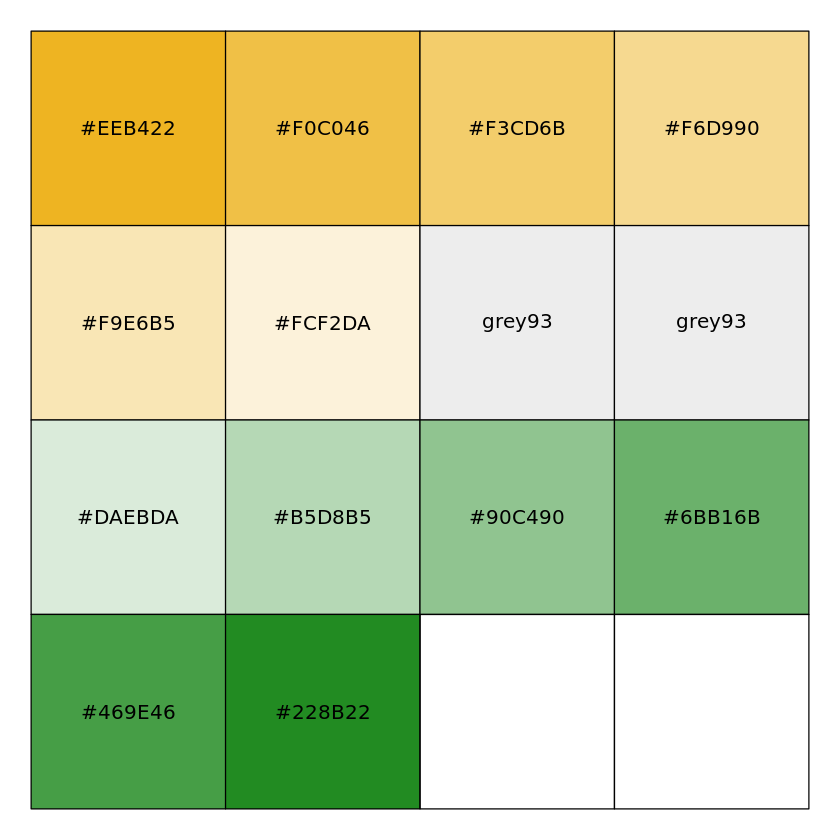

In [90]:
dv_cols <- setNames(c(rev(c2), c3), dv_marques)
scales::show_col(dv_cols)
dv_cols
names(dv_cols)

In [91]:
# We filter-out duplicated gene names and NA
DV_FC <- DV_FC[!duplicated(DV_FC$GeneHuman) & !is.na(DV_FC$GeneHuman),]

In [92]:
# We set slopes of NA to 0
DV_FC[is.na(DV_FC)] <- 0

In [93]:
# Create df of breaks 
dv_breaks <- apply(DV_FC[,-c(1)], 2, function(x){ cut(as.numeric(x), breaks = dv_b)  }) %>% as.data.frame()
dv_breaks$GeneHuman <- DV_FC$GeneHuman
head(dv_breaks)

,Day8,Day17,Day30,GeneHuman
,<chr>,<chr>,<chr>,<chr>
1,"(-0.25,0]","(0.5,1]","(-0.5,-0.25]",1/2-SBSRNA4
2,"(-0.25,0]","(-0.5,-0.25]","(-0.25,0]",A1BG
3,"(0,0.25]","(-0.25,0]","(-0.25,0]",A1BG-AS1
4,"(0.25,0.5]","(2,4]","(0.5,1]",A1CF
5,"(0,0.25]","(0.5,1]","(1,2]",A2LD1
6,"(-1,-0.5]","(1,2]","(7,22]",A2M


In [94]:
sum(!rownames(disease_full) %in% dv_breaks$GeneHuman)

[1] 0

In [95]:
meta.colors[['dv']] <- dv_cols

In [96]:
meta.colors

$PeakSample
 P2.FGF20  P2.FGF10   P2.FGF1 P2.FGF0.1  P3.FGF20  P3.FGF10   P3.FGF1 P3.FGF0.1 
"#006D2C" "#31A354" "#74C476" "#BAE4B3" "#08519C" "#3182BD" "#6BAED6" "#BDD7E7" 
 P4.FGF20  P4.FGF10   P4.FGF1 P4.FGF0.1  P6.FGF20  P6.FGF10   P6.FGF1 P6.FGF0.1 
"#A50F15" "#DE2D26" "#FB6A4A" "#FCAE91" "#54278F" "#756BB1" "#9E9AC8" "#CBC9E2" 
 P8.FGF20  P8.FGF10   P8.FGF1 P8.FGF0.1 
"#252525" "#636363" "#969696" "#CCCCCC" 

$decon
    (0.85,1]   (0.7,0.85]    (0.5,0.7]   (0.25,0.5]     (0,0.25]    (-0.25,0] 
   "#5F9EA0"    "#87B6B7"    "#AFCECF"     "grey93"     "grey93"     "grey93" 
(-0.5,-0.25]  (-0.7,-0.5] (-0.85,-0.7]   (-1,-0.85] 
    "grey93"    "#C47F7F"    "#A83F3F"    "#8B0000" 

$telley
    (0.85,1]   (0.7,0.85]    (0.5,0.7]   (0.25,0.5]     (0,0.25]    (-0.25,0] 
   "#5F9EA0"    "#87B6B7"    "#AFCECF"     "grey93"     "grey93"     "grey93" 
(-0.5,-0.25]  (-0.7,-0.5] (-0.85,-0.7]   (-1,-0.85] 
    "grey93"    "#C47F7F"    "#A83F3F"    "#8B0000" 

$dv
    (-22,-7]      (-7,-4]      (-4,-2]      (-2,-1]    (-1,-0.5] (-0.5,-0.25] 
   "#EEB422"    "#F0C046"    "#F3CD6B"    "#F6D990"    "#F9E6B5"    "#FCF2DA" 
   (-0.25,0]     (0,0.25]   (0.25,0.5]      (0.5,1]        (1,2]        (2,4] 
    "grey93"     "grey93"    "#DAEBDA"    "#B5D8B5"    "#90C490"    "#6BB16B" 
       (4,7]       (7,22] 
   "#469E46"    "#228B22"

### Supplementary table 3  
We want to provide the results of the differential expression between dorsally and ventrally biased lines.  


In [97]:
dfs <- list(
    'DEGs DIV8' = as.data.frame(r8),
    'DEGs DIV17' = as.data.frame(r17),
    'DEGs DIV30' = as.data.frame(r30)
)


lapply(dfs, function(x){
    dd <- x %>% mutate(DV=plyr::mapvalues(x = sign(log2FoldChange), from=c(-1,0,1), to=c('Ventral', 'None', 'Dorsal')))
    
    dd <- merge(dd, dis_df.original, by='row.names', all.x=T, all.y=F) %>%
        mutate_at(.vars = colnames(dis_df.original), function(X){ifelse(is.na(X), 0, X)})
    
    colnames(dd)[1] <- 'Gene'
    dd %>% arrange(DV, padj)
}) -> dfs

# Add tables of significant results
lapply(dfs, subset, padj < 0.05) %>% setNames(nm=paste('Significant', names(dfs))) %>% c(., dfs) -> dfs

openxlsx::write.xlsx(x = dfs, file = 'results/supp_table.3.Dorso_Ventral_DEGs.xlsx', rowNames=F)

## Disease palette

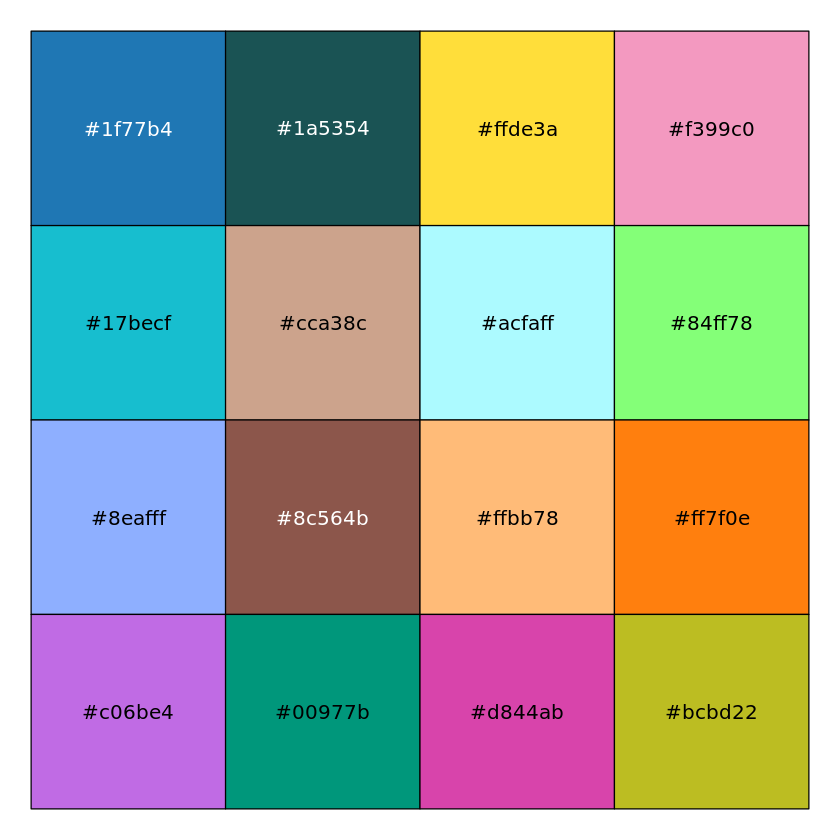

In [98]:
dis.legend <- substr(c(
    'Microcephaly' = '#1f77b4',
    'Hydrocephaly' = '#1a5354ff',
    'RareMCD' = '#ffde3aff',
    'MDD_2018' = '#f399c0ff',
    'Lissencephaly' = '#17becfff',
    'BD_2019' = '#cca38cff',
    'DevDyslexia' = '#acfaffff',
    'Heterotopia' = '#84ff78ff',
    'Polymicrogyria' = '#8eafffff',
    'SCZ_2020' = '#8c564bff',
    'AN_2019' = '#ffbb78ff',
    'NEUROT_2018' = '#ff7f0eff',
    'ADHD_2019' = '#c06be4ff',
    'DD' = '#00977bff',
    'FCDandmTOR' = '#d844abff',
    'ASD' = '#bcbd22ff'
), start=0, stop=7)
scales::show_col(dis.legend)

In [99]:
meta.colors[['Disease']] <- dis.legend

In [100]:
meta.colors

$PeakSample
 P2.FGF20  P2.FGF10   P2.FGF1 P2.FGF0.1  P3.FGF20  P3.FGF10   P3.FGF1 P3.FGF0.1 
"#006D2C" "#31A354" "#74C476" "#BAE4B3" "#08519C" "#3182BD" "#6BAED6" "#BDD7E7" 
 P4.FGF20  P4.FGF10   P4.FGF1 P4.FGF0.1  P6.FGF20  P6.FGF10   P6.FGF1 P6.FGF0.1 
"#A50F15" "#DE2D26" "#FB6A4A" "#FCAE91" "#54278F" "#756BB1" "#9E9AC8" "#CBC9E2" 
 P8.FGF20  P8.FGF10   P8.FGF1 P8.FGF0.1 
"#252525" "#636363" "#969696" "#CCCCCC" 

$decon
    (0.85,1]   (0.7,0.85]    (0.5,0.7]   (0.25,0.5]     (0,0.25]    (-0.25,0] 
   "#5F9EA0"    "#87B6B7"    "#AFCECF"     "grey93"     "grey93"     "grey93" 
(-0.5,-0.25]  (-0.7,-0.5] (-0.85,-0.7]   (-1,-0.85] 
    "grey93"    "#C47F7F"    "#A83F3F"    "#8B0000" 

$telley
    (0.85,1]   (0.7,0.85]    (0.5,0.7]   (0.25,0.5]     (0,0.25]    (-0.25,0] 
   "#5F9EA0"    "#87B6B7"    "#AFCECF"     "grey93"     "grey93"     "grey93" 
(-0.5,-0.25]  (-0.7,-0.5] (-0.85,-0.7]   (-1,-0.85] 
    "grey93"    "#C47F7F"    "#A83F3F"    "#8B0000" 

$dv
    (-22,-7]      (-7,-4]      (-4,-2]      (-2,-1]    (-1,-0.5] (-0.5,-0.25] 
   "#EEB422"    "#F0C046"    "#F3CD6B"    "#F6D990"    "#F9E6B5"    "#FCF2DA" 
   (-0.25,0]     (0,0.25]   (0.25,0.5]      (0.5,1]        (1,2]        (2,4] 
    "grey93"     "grey93"    "#DAEBDA"    "#B5D8B5"    "#90C490"    "#6BB16B" 
       (4,7]       (7,22] 
   "#469E46"    "#228B22" 

$Disease
  Microcephaly   Hydrocephaly        RareMCD       MDD_2018  Lissencephaly 
     "#1f77b4"      "#1a5354"      "#ffde3a"      "#f399c0"      "#17becf" 
       BD_2019    DevDyslexia    Heterotopia Polymicrogyria       SCZ_2020 
     "#cca38c"      "#acfaff"      "#84ff78"      "#8eafff"      "#8c564b" 
       AN_2019    NEUROT_2018      ADHD_2019             DD     FCDandmTOR 
     "#ffbb78"      "#ff7f0e"      "#c06be4"      "#00977b"      "#d844ab" 
           ASD 
     "#bcbd22"

## Gene meta-data annotation

The pool of genes is the one in `disease_full`, including all disease-linked genes and all expressed genes.

In [101]:
facets <- list(
    decon = colnames(decon_breaks)[-4],
    telley = colnames(telley_breaks)[-5],
    dv = colnames(dv_breaks)[-4]
)

In [102]:
facets

$decon
[1] "CPN" "SCP" "CTH"

$telley
[1] "E12" "E13" "E14" "E15"

$dv
[1] "Day8"  "Day17" "Day30"

In [103]:
sum(!rownames(disease_full) %in% rownames(PeakSample))

[1] 0

In [104]:
GeneAnnotation <- data.frame(
    row.names=rownames(disease_full),
    GeneHuman=rownames(disease_full)
) %>% merge(y=PeakSample, by.x='GeneHuman', by.y=0, all.x=T, all.y=F)


In [105]:
GeneAnnotation <- GeneAnnotation %>% 
    merge(y=decon_breaks, by='GeneHuman', all.x=T, all.y=F) %>% 
    merge(y=telley_breaks, by='GeneHuman', all.x=T, all.y=F) %>% 
    merge(y=dv_breaks, by='GeneHuman', all.x=T, all.y=F)

rownames(GeneAnnotation) <- GeneAnnotation$GeneHuman

In [106]:
head(GeneAnnotation)

,GeneHuman,PeakSample,SampleColor,PeakSampleFct,CPN,SCP,CTH,E12,E13,E14,E15,Day8,Day17,Day30
,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1/2-SBSRNA4,1/2-SBSRNA4,P3.FGF10,#3182BD,P3.FGF10,NA,NA,NA,NA,NA,NA,NA,"(-0.25,0]","(0.5,1]","(-0.5,-0.25]"
A1BG,A1BG,P2.FGF20,#006D2C,P2.FGF20,NA,NA,NA,NA,NA,NA,NA,"(-0.25,0]","(-0.5,-0.25]","(-0.25,0]"
A1BG-AS1,A1BG-AS1,P3.FGF1,#6BAED6,P3.FGF1,NA,NA,NA,NA,NA,NA,NA,"(0,0.25]","(-0.25,0]","(-0.25,0]"
A1CF,A1CF,P3.FGF1,#6BAED6,P3.FGF1,NA,NA,NA,NA,NA,NA,NA,"(0.25,0.5]","(2,4]","(0.5,1]"
A2LD1,A2LD1,P3.FGF1,#6BAED6,P3.FGF1,NA,NA,NA,NA,NA,NA,NA,"(0,0.25]","(0.5,1]","(1,2]"
A2M,A2M,P8.FGF10,#636363,P8.FGF10,"(0.7,0.85]","(0.5,0.7]","(0.5,0.7]","(-1,-0.85]","(-1,-0.85]","(0,0.25]","(0.85,1]","(-1,-0.5]","(1,2]","(7,22]"


In [107]:
for (f.var in names(facets)){
    for (cl in facets[[f.var]]){
        GeneAnnotation[,paste0(cl,'Color')] <- meta.colors[[f.var]][GeneAnnotation[,cl]]
    }
}
for (cl in names(meta.colors)[!names(meta.colors)%in%names(facets)]){
    print(cl)
    if(cl=='Disease'){next()}
    GeneAnnotation[,paste0(cl,'Color')] <- meta.colors[[cl]][GeneAnnotation[,cl]]
}
GeneAnnotation

[1] "PeakSample"
[1] "Disease"


,GeneHuman,PeakSample,SampleColor,PeakSampleFct,CPN,SCP,CTH,E12,E13,E14,⋯,SCPColor,CTHColor,E12Color,E13Color,E14Color,E15Color,Day8Color,Day17Color,Day30Color,PeakSampleColor
,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1/2-SBSRNA4,1/2-SBSRNA4,P3.FGF10,#3182BD,P3.FGF10,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,grey93,#B5D8B5,#FCF2DA,#3182BD
A1BG,A1BG,P2.FGF20,#006D2C,P2.FGF20,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,grey93,#FCF2DA,grey93,#006D2C
A1BG-AS1,A1BG-AS1,P3.FGF1,#6BAED6,P3.FGF1,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,grey93,grey93,grey93,#6BAED6
A1CF,A1CF,P3.FGF1,#6BAED6,P3.FGF1,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,#DAEBDA,#6BB16B,#B5D8B5,#6BAED6
A2LD1,A2LD1,P3.FGF1,#6BAED6,P3.FGF1,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,grey93,#B5D8B5,#90C490,#6BAED6
A2M,A2M,P8.FGF10,#636363,P8.FGF10,"(0.7,0.85]","(0.5,0.7]","(0.5,0.7]","(-1,-0.85]","(-1,-0.85]","(0,0.25]",⋯,#AFCECF,#AFCECF,#8B0000,#8B0000,grey93,#5F9EA0,#F9E6B5,#90C490,#228B22,#636363
A2ML1,A2ML1,P2.FGF10,#31A354,P2.FGF10,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,#F6D990,grey93,grey93,#31A354
A2MP1,A2MP1,P6.FGF20,#54278F,P6.FGF20,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,grey93,grey93,grey93,#54278F
A4GALT,A4GALT,P3.FGF1,#6BAED6,P3.FGF1,"(0.5,0.7]","(-0.5,-0.25]","(-0.5,-0.25]",NA,NA,NA,⋯,grey93,grey93,NA,NA,NA,NA,grey93,#F9E6B5,#6BB16B,#6BAED6


In [108]:
GeneAnnotation$Gene

[1] "1/2-SBSRNA4"            "A1BG"                  
    [3] "A1BG-AS1"               "A1CF"                  
    [5] "A2LD1"                  "A2M"                   
    [7] "A2ML1"                  "A2MP1"                 
    [9] "A4GALT"                 "A4GNT"                 
   [11] "AA06"                   "AAA1"                  
   [13] "AAAS"                   "AACS"                  
   [15] "AACSP1"                 "AADACL2"               
   [17] "AADACL3"                "AADAT"                 
   [19] "AAGAB"                  "AAK1"                  
   [21] "AAMP"                   "AANAT"                 
   [23] "AARS"                   "AARS2"                 
   [25] "AARSD1"                 "AASDH"                 
   [27] "AASDHPPT"               "AASS"                  
   [29] "AATF"                   "AATK"                  
   [31] "AATK-AS1"               "ABAT"                  
   [33] "ABCA1"                  "ABCA10"                
   [35] "ABCA11P"                "ABCA12"                
   [37] "ABCA13"                 "ABCA17P"               
   [39] "ABCA2"                  "ABCA3"                 
   [41] "ABCA4"                  "ABCA5"                 
   [43] "ABCA6"                  "ABCA7"                 
   [45] "ABCA8"                  "ABCA9"                 
   [47] "ABCB1"                  "ABCB10"                
   [49] "ABCB11"                 "ABCB4"                 
   [51] "ABCB5"                  "ABCB6"                 
   [53] "ABCB7"                  "ABCB8"                 
   [55] "ABCB9"                  "ABCC1"                 
   [57] "ABCC10"                 "ABCC11"                
   [59] "ABCC12"                 "ABCC13"                
   [61] "ABCC2"                  "ABCC3"                 
   [63] "ABCC4"                  "ABCC5"                 
   [65] "ABCC6"                  "ABCC6P1"               
   [67] "ABCC6P2"                "ABCC8"                 
   [69] "ABCC9"                  "ABCD1"                 
   [71] "ABCD2"                  "ABCD3"                 
   [73] "ABCD4"                  "ABCE1"                 
   [75] "ABCF1"                  "ABCF2"                 
   [77] "ABCF3"                  "ABCG1"                 
   [79] "ABCG2"                  "ABCG4"                 
   [81] "ABCG5"                  "ABCG8"                 
   [83] "ABHD1"                  "ABHD10"                
   [85] "ABHD11"                 "ABHD11-AS1"            
   [87] "ABHD12"                 "ABHD12B"               
   [89] "ABHD13"                 "ABHD14A"               
   [91] "ABHD14A-ACY1"           "ABHD14B"               
   [93] "ABHD15"                 "ABHD16A"               
   [95] "ABHD16B"                "ABHD2"                 
   [97] "ABHD3"                  "ABHD4"                 
   [99] "ABHD5"                  "ABHD6"                 
  [101] "ABHD8"                  "ABI1"                  
  [103] "ABI2"                   "ABI3"                  
  [105] "ABI3BP"                 "ABL1"                  
  [107] "ABL2"                   "ABLIM1"                
  [109] "ABLIM2"                 "ABLIM3"                
  [111] "ABO"                    "ABP1"                  
  [113] "ABR"                    "ABT1"                  
  [115] "ABTB1"                  "ABTB2"                 
  [117] "ACAA1"                  "ACAA2"                 
  [119] "ACACA"                  "ACACB"                 
  [121] "ACAD10"                 "ACAD11"                
  [123] "ACAD8"                  "ACAD9"                 
  [125] "ACADL"                  "ACADM"                 
  [127] "ACADS"                  "ACADSB"                
  [129] "ACADVL"                 "ACAN"                  
  [131] "ACAP1"                  "ACAP2"                 
  [133] "ACAP3"                  "ACAT1"                 
  [135] "ACAT2"                  "ACBD3"                 
  [137] "ACBD4"                  "ACBD5"                 
  

## Save graphical pars

In [109]:
save(list=c('GeneAnnotation', 'meta.colors', 'facets'), file = 'data/graphical.rda')

# FMRP/CHD8 target lists

In [110]:
### FMRP CHD8 Targets

library(openxlsx)
library(reshape2)
library(ggplot2)
library(biomaRt)
library(dplyr)


convertMouseGeneList <- function(x){
    
    
  human = useMart("ensembl", dataset = "hsapiens_gene_ensembl")
  mouse = useMart("ensembl", dataset = "mmusculus_gene_ensembl")
  
  genesV2 = getLDS(attributes = c("mgi_symbol"), filters = "mgi_symbol", values = x , mart = mouse, attributesL = c("hgnc_symbol"), martL = human, uniqueRows=T)
  humanx <- unique(genesV2[,])
  
  # Print the first 6 genes found to the screen
  print(head(humanx))
  return(humanx)
}


tryMirrors <- function(fn, mirrors = c('www', 'useast', 'asia'), max.retries=100, retry.sleep = 300,  ...){
    
    i <- 1
    retry <- T
    tries <- 0
    
    while (retry & (tries <= max.retries)){
        
        if(i>length(mirrors)){
            tries <- tries +1
            i <- 1
            print('Waiting 5min')
            Sys.sleep(time = retry.sleep)
            print(paste('Start try', as.character(tries)))
        }
        
        tryCatch(expr = {
            
            m <- mirrors[i]
            message(m)
            mart <- useEnsembl(biomart = "ensembl", mirror = m)
            r <- fn(...)
            retry <- F
        }, error=function(x){message('Failed')})
        
        i <- i+1
    }
    
    return(r)

}

In [188]:
chd8_Werling <- read.table("./raw/CHD8_FMRP_Targets/CHD8_targets.txt", header=F)
chd8_Sugathan <- read.table("./raw/CHD8_FMRP_Targets/Sugathan_et_al_2014.txt", header = TRUE)
chd8_SugathanHC <- read.table("./raw/CHD8_FMRP_Targets/Sugathan_et_al_2014_HC.txt", header = TRUE)

filename <-"./raw/CHD8_FMRP_Targets/41467_2015_BFncomms7404_MOESM1023_ESM.xlsx"
sheets <- openxlsx::getSheetNames(filename)
chd8_Cotney <- lapply(sheets,openxlsx::read.xlsx,xlsxFile=filename)
names(chd8_Cotney) <- sheets
chd8_Cotney <- lapply(chd8_Cotney, function(x){subset(x, !grepl(Gene, pattern='^\\d+$')& (Gene!='.'))})

fmrp_Darnell <- read.table("./raw/CHD8_FMRP_Targets/Darnell_2011.txt", header=FALSE)
fmrp_Casingal <- read.table("./raw/CHD8_FMRP_Targets/Casingal_2020.txt", header=FALSE)

In [189]:
grep(chd8_Werling$V1, pattern='^\\d+$', invert=F, value=T)
grep(chd8_Sugathan$Gene, pattern='^\\d+$', invert=F, value=T)
grep(chd8_SugathanHC$Gene, pattern='^\\d+$', invert=F, value=T)
grep(fmrp_Darnell$V1, pattern='^\\d+$', invert=F, value=T)
grep(fmrp_Casingal$V1, pattern='^\\d+$', invert=F, value=T)


character(0)

character(0)

character(0)

character(0)

character(0)

In [190]:
# Ideally, we would retrieve orthologs with BioMart,
# fmrp_Casingal <- tryMirrors(fn=convertMouseGeneList, x=fmrp_Casingal$V1)

In [191]:
# but since it's been down for a week
orthologs <- read.csv('./raw/CHD8_FMRP_Targets/mm2hs.mart_export.txt', sep='\t')

print('Mouse genes in orthologs')
table(fmrp_Casingal$V1 %in% orthologs$Gene.name)

found.orthos <- subset(orthologs, Gene.name %in% fmrp_Casingal$V1)
print('Unique mouse genes found')
table(!duplicated(found.orthos$Gene.name))

fmrp_Casingal <- found.orthos %>% dplyr::rename(V1 = Gene.name, HGNC.symbol = Human.gene.name) %>% dplyr::select(V1, HGNC.symbol)

[1] "Mouse genes in orthologs"



FALSE  TRUE 
   55   866 

[1] "Unique mouse genes found"



FALSE  TRUE 
    5   813 

In [192]:
fmrp_TOTAL <- unique(c(fmrp_Casingal$HGNC.symbol, fmrp_Darnell$V1))
chd8_TOTAL <- unique( c(chd8_Sugathan$Gene, chd8_SugathanHC$Gene, chd8_Cotney[["hNSC_Chd8_prom"]]$Gene,  
                        chd8_Cotney[["hNSC_specific_Chd8_prom"]]$Gene, chd8_Cotney[["human_brain_Chd8_prom"]]$Gene,
                        chd8_Cotney[["hNSC+human_brain_Chd8_prom"]]$Gene, chd8_Cotney[["hNSC+human+mouse_Chd8_prom"]]$Gene,
                        chd8_Cotney[["hNSC_Chd8_enhancer"]]$Gene, chd8_Cotney[["hNSC+human_brain_Chd8_enhancer"]]$Gene,
                        chd8_Cotney[["human_brain_Chd8_enhancer"]]$Gene, chd8_Cotney[["hNSC+human+mouse_Chd8_enhancer"]]$Gene) )

genes_TOTAL <- unique(c(fmrp_TOTAL, chd8_TOTAL, recursive=T))


In [203]:
#### Aqui la tabla que necesitamos
chd8fmrp_table <- data.frame(GENE=genes_TOTAL,
                             FMRP_Casingal = ifelse(genes_TOTAL %in% fmrp_Casingal$HGNC.symbol, 1,0),
                             FMRP_Darnell = ifelse(genes_TOTAL %in% fmrp_Darnell$V1, 1,0),
                             hNSC_enhancer = ifelse(genes_TOTAL %in% chd8_Cotney[["hNSC_Chd8_enhancer"]]$Gene, 1,0),
                             hNSC_human_brain_enhancer = ifelse(genes_TOTAL %in% chd8_Cotney[["hNSC+human_brain_Chd8_enhancer"]]$Gene, 1,0),
                             hNSC_human_brain_prom = ifelse(genes_TOTAL %in% chd8_Cotney[["hNSC+human_brain_Chd8_prom"]]$Gene, 1,0),
                             hNSC_human_mouse_enhancer = ifelse(genes_TOTAL %in% chd8_Cotney[["hNSC+human+mouse_Chd8_enhancer"]]$Gene, 1,0),
                             hNSC_human_mouse_prom = ifelse(genes_TOTAL %in% chd8_Cotney[["hNSC+human+mouse_Chd8_prom"]]$Gene, 1,0),
                             hNSC_prom = ifelse(genes_TOTAL %in% chd8_Cotney[["hNSC_Chd8_prom"]]$Gene, 1,0),
                             hNSC_specific_prom = ifelse(genes_TOTAL %in% chd8_Cotney[["hNSC_specific_Chd8_prom"]]$Gene, 1,0),
                             human_brain_enhancer = ifelse(genes_TOTAL %in% chd8_Cotney[["human_brain_Chd8_enhancer"]]$Gene, 1,0),
                             human_brain_prom = ifelse(genes_TOTAL %in% chd8_Cotney[["human_brain_Chd8_prom"]]$Gene, 1,0),
                             Sugathan_2014 = ifelse(genes_TOTAL %in% chd8_Sugathan$Gene, 1,0),
                             Sugathan_2014_HC = ifelse(genes_TOTAL %in% chd8_SugathanHC$Gene, 1,0)
                             )

save(fmrp_TOTAL, chd8_TOTAL, chd8fmrp_table, file="../FMRP_CHD8_table.rda")

In [216]:
anno.chd8fmrp_table <- cbind(
    Pass.FGF = ifelse(chd8fmrp_table$GENE%in%names(peakSample),
                      plyr::mapvalues(x = chd8fmrp_table$GENE,
                                      from=names(peakSample), 
                                      to=peakSample, warn_missing = F), 
                      NA) %>% factor(levels=colnames(peak.data)),
    chd8fmrp_table
)


anno.chd8fmrp_table <- merge(anno.chd8fmrp_table, dis_df.original, 
                             by.x='GENE', by.y='row.names', all.x=T, all.y=F) %>% 
    mutate_at(.vars = colnames(dis_df.original), 
              function(x){ifelse(is.na(x), 0, x)})
anno.chd8fmrp_table <- anno.chd8fmrp_table %>% arrange_at(colnames(anno.chd8fmrp_table)[-c(1:2)], .funs = '-') %>% arrange(Pass.FGF)

In [217]:
openxlsx::write.xlsx(anno.chd8fmrp_table, 'results/supp_table.2.FMRP_CHD8_targets.xlsx', row.Names=F)

In [113]:
options(repr.plot.width=10)

ComplexHeatmap version 2.15.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




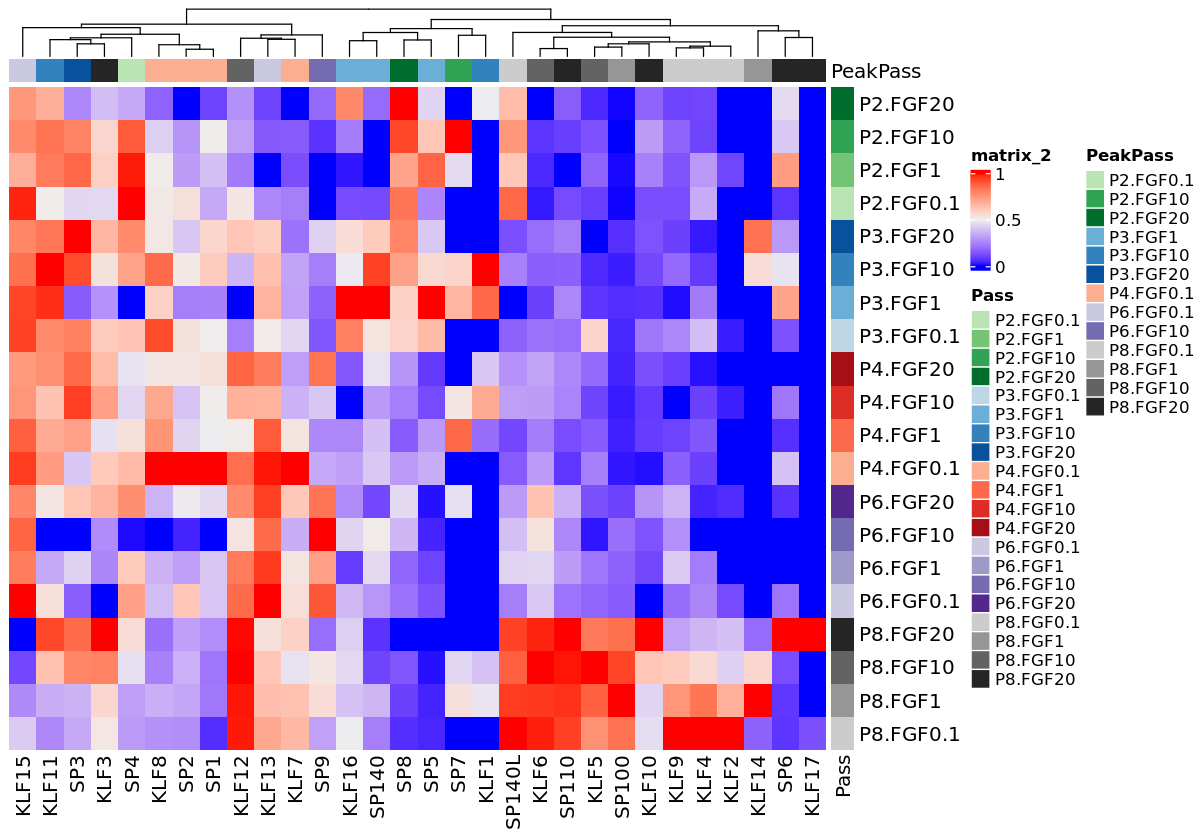

In [114]:
klf.sp.exp <- exp.data[grep('^KLF|^SP\\d+', rownames(exp.data), value=T),]
klf.sp.exp <- apply(klf.sp.exp, 1, scales::rescale, to=c(0,1))

library(ComplexHeatmap)

Heatmap(
    klf.sp.exp, cluster_rows = F, 
    top_annotation = HeatmapAnnotation(
        PeakPass = GeneAnnotation[colnames(klf.sp.exp),]$PeakSample,
        col=list(PeakPass=meta.colors$PeakSample)
    ),
    right_annotation = rowAnnotation(
        Pass=names(meta.colors$PeakSample),
        col=list(Pass=meta.colors$PeakSample))
    )

# Extras // olds // to-dos